## TotalSegmentator Dataset Analysis

This notebook serves as an initial analysis of *TotalSegmentator v2.3.0* dataset. The dataset contains CT (computer tomography) and MR (magnetic resonance) images of most major anatomical structures. However, for the sake of clarity, we decided to concentarte our research on CT scans only. 

### Dataset Overview

TotalSegmentator, created by Jakob Wasserthal (*University Hospital Basel, Department of Radiology and Nuclear Medicine*, Switzerland), is currently the largest publicly available annotated CT segmentation dataset, crucial for advancing research in medical image analysis. The first data version was released in July 2022, and in September 2023 TotalSegmentator underwent a notable update. The details include:

* **Name**: TotalSegmentator
* **Description**: Comprehensive tool for segmentation of 117 anatomical structures in medical imaging.
* **Latest Release**: v2.3.0-weights, released on July 2024
* **License**: Apache-2.0 License (for anatomical structures mentioned), https://backend.totalsegmentator.com/license-academic/ (for other body parts)


*Dataset Meta Information*

| Modallity | Dimensions | Task Type | Anatomical Structures | Anatomical Area | No. of Categories | Data Volume | File Format |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: | :---: | 
| CT/ MR | 3D | Segmentation | Whole Body | Whole Body | 117 | 1228 | .nii.gz

*Resolution Details* 

| Resolution Level | Spacing (mm)| Size |
| :---: | :---: | :---: |
| Original Image     | (1.5, 1.5, 1.5)| (47, 48, 29)   |
| Medium Resolution  | (1.5, 1.5, 1.5)| (241, 231, 231)|
| High Resolution    | (1.5, 1.5, 1.5)| (499, 467, 851)|

The total number of image voxels is 317,863 (from the 1228 total dataset cases).

As label information statistics involves information of all 117 structures (Organ, Cases, Coverage, Volume, Adjusted Volume), all details can be found here: https://github.com/openmedlab/Awesome-Medical-Dataset/blob/main/resources/TotalSegmentator_v2.md

### Dataset Visualization and Labels

As mentioned above, the TotalSegmentator dataset includes labels corresponding to the following anatomical structures:

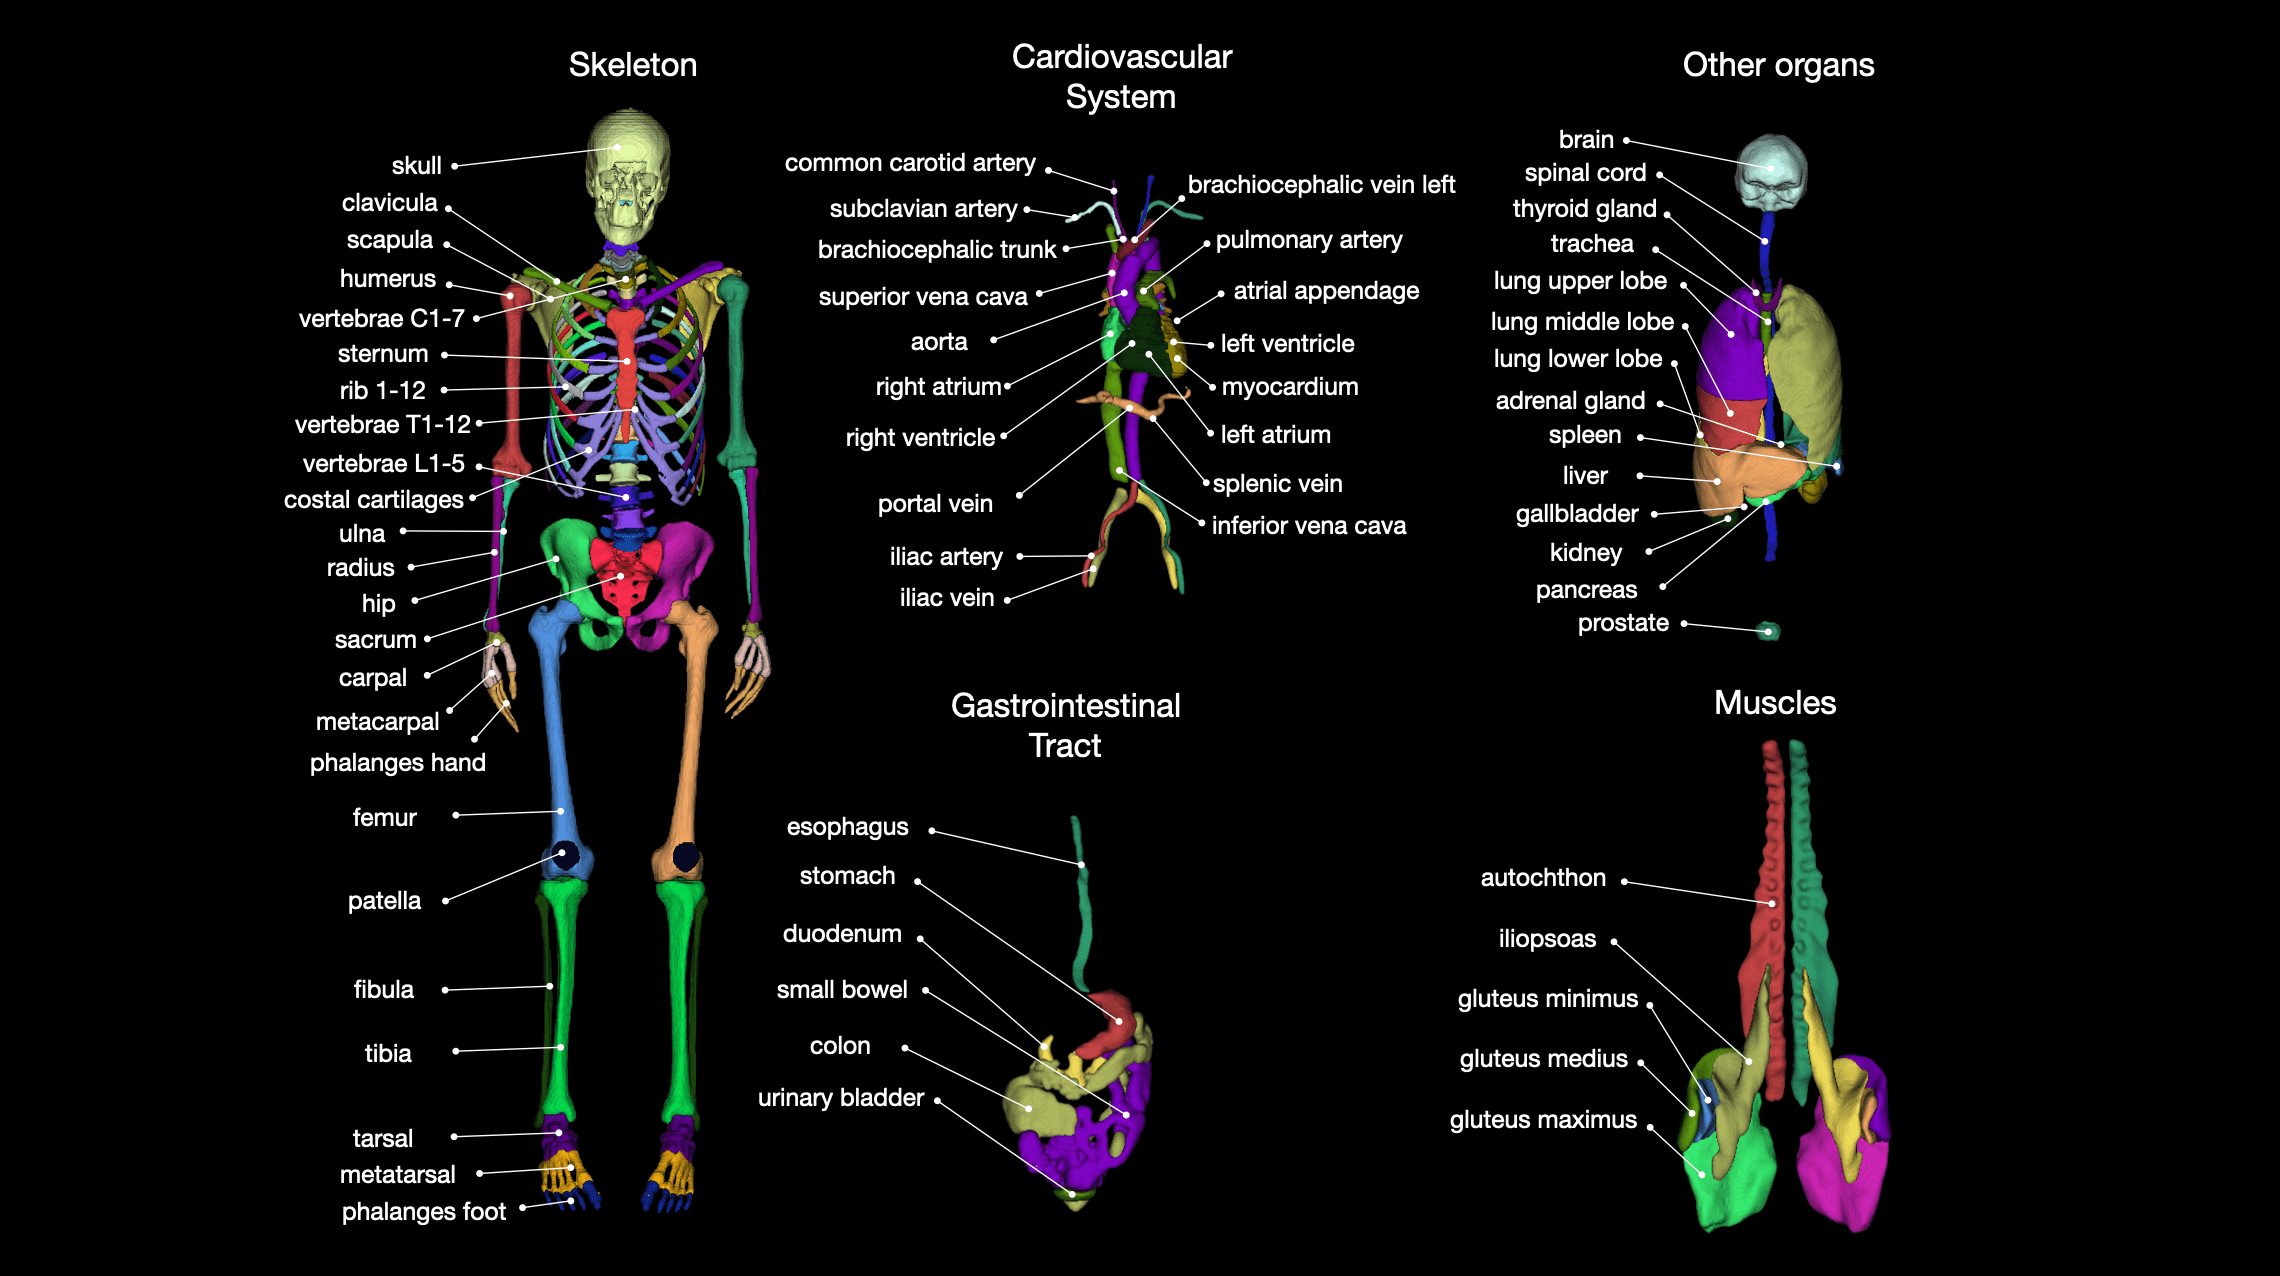

*Visualization from official website.* (Wasserthal, n.d.)

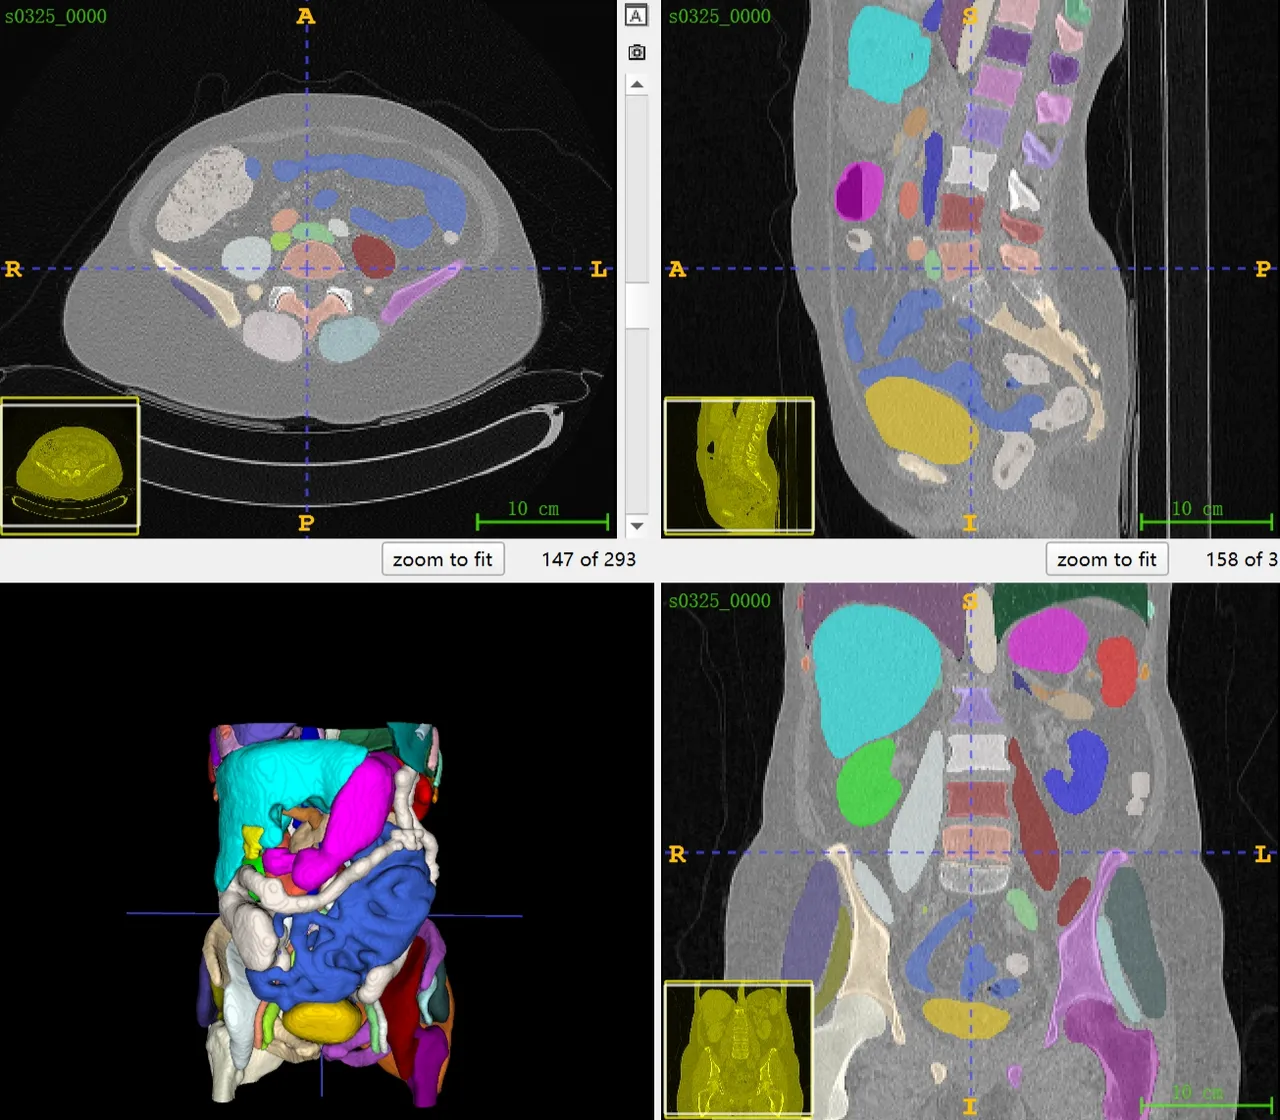

*Visualization using ITK-SNAP on large image.* (OpenMedLab, n.d.)

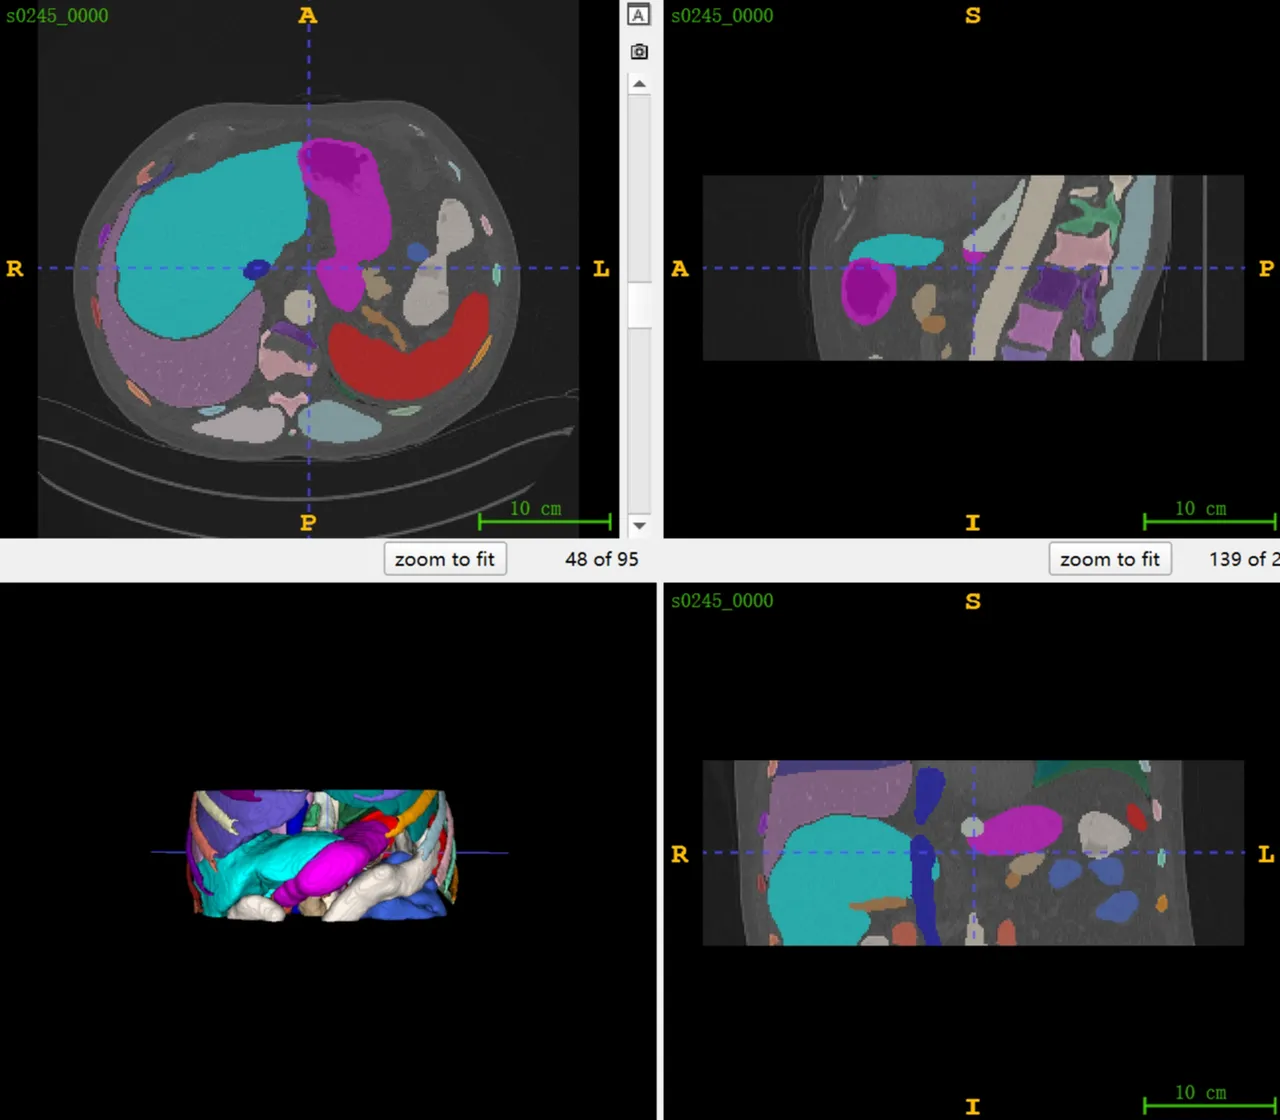

*Visualization using ITK-SNAP on small image.* (OpenMedLab, n.d.)


All structures are available here: https://backend.totalsegmentator.com/find-task/. While clicking an appropriate structure, we are able to observe part of task, as well as we can call TotalSegmentator in a specific way in the terminal.

Additionally, throughout the years, there was a fair increase in number of images, from 1204 to 1228 (in the test set solely), and the number of annotation categories as well, from 104 to 117. 

### Directory Structure Analysis

After downloading and decompressing .zip file, it comprises of a meta.csv file and sxxxx subdirectiories, where xxxx denote consecutive digits. Besides, each sxxxx subdirectory contains a segmentation folder and a ct.nii.gz file:


<pre>
Totalsegmentator_dataset_v2
│
├── meta.csv
│
├── s0000
│   ├── segmentations
│   │   ├── adrenal_gland_left.nii.gz
│   │   ├── adrenal_gland_right.nii.gz
│   │   ├── aorta.nii.gz
│   │   └── ...
│   ├── ct.nii.gz
│
├── s0001
├── s0002
├── ...
└── s1429
</pre> 

In the meta.csv, each row denotes an imaging data, picture ID (image_id), age (age), gender (gender), institution code (institute), body part or examination range (study_type) dataset division (split), scanner maufacturer (manufacturer), model of a scanner (scanner_model), peak kilovoltage - maximum high voltage applied across X-ray tube to produce X-rays (kvp), pathology type (pathology) and its location (pathology_location). 
These data cover CT scans of body parts from different institutions and are divided into three subsets: training, validation, and testing. Below code provides the outlook of the first five datset records:

In [17]:
import pandas as pd
import os
import warnings as wr
wr.filterwarnings('ignore')

# loading and reading dataset 
file_path = 'Totalsegmentator_dataset_v201/meta.csv'    # source: https://www.analyticsvidhya.com/blog/2022/07/step-by-step-exploratory-data-analysis-eda-using-python/
df = pd.read_csv(file_path, delimiter=';')

# displaying first 10 rows of df
print(f"\nFirst 10 rows of the dataframe:")
print(df.head(10))


First 10 rows of the dataframe:
  image_id   age gender institute                         study_type  split  \
0    s1366  50.0    NaN         I                      ct polytrauma  train   
1    s0245  77.0      m         I                  ct abdomen-pelvis  train   
2    s0325  65.0      f         I                  ct abdomen-pelvis  train   
3    s0320  80.0      m         I  ct angiography abdomen-pelvis-leg  train   
4    s0193  63.0      m         C                  ct abdomen-pelvis  train   
5    s0189  50.0      m         I                    ct aortic valve  train   
6    s0330  67.0      f         I                  ct  intervention   train   
7    s0329  46.0      m         C                  ct abdomen-pelvis  train   
8    s0326  56.0      m         C                            ct neck  train   
9    s0328  60.0      m         I                  ct abdomen-pelvis  train   

  manufacturer             scanner_model    kvp     pathology  \
0      siemens              sens

However, the image data is not ordered properly. To address it, we have to slightly change the above code by ordering it by image_id:

In [16]:
import pandas as pd
import os
import warnings as wr
wr.filterwarnings('ignore')

# loading and reading dataset 
file_path = 'Totalsegmentator_dataset_v201/meta.csv'
df = pd.read_csv(file_path, delimiter=';')

df = df.sort_values(by=['image_id']) # sorting by image_id

# displaying first sorted 10 rows of df
print(f"\nFirst sorted 10 rows of the dataframe:")
print(df.head(10)) # extracting first 10 records 


First sorted 10 rows of the dataframe:
    image_id   age gender institute                     study_type  split  \
263    s0000  29.0      f         I                      ct pelvis    val   
262    s0001  58.0      f         I              ct abdomen-pelvis  train   
143    s0002  49.0      f         I                 ct thorax-neck  train   
261    s0003  47.0      f         I                       ct spine  train   
260    s0004  71.0      f         C       ct thorax-abdomen-pelvis  train   
259    s0006  46.0      m         I              ct abdomen-pelvis  train   
257    s0009  85.0      f         I                       ct spine  train   
250    s0010  63.0      m         I              ct abdomen-pelvis  train   
206    s0011  49.0      m         C  ct neck-thorax-abdomen-pelvis  train   
192    s0012  53.0      f         C              ct abdomen-pelvis  train   

    manufacturer             scanner_model    kvp     pathology  \
263      siemens    somatom definition as+  1

### Sample Slices from NIfTI Files

Now, we will show a sample slice from each anatomical plane for the first 10 images in the dataset. The code will also print some basic information about each image, such as patient's age, gender, pathology and its location. Besides, only the axial plane is shown:


s1366: Age: 50.0, Gender: nan, Pathology: unclear, Pathology Location: unclear 
CT scan dimensions: (333, 333, 336)


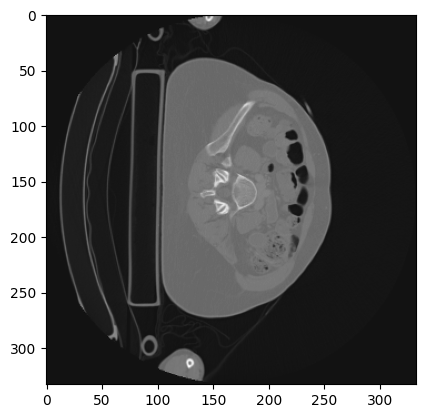


s0245: Age: 77.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 
CT scan dimensions: (277, 277, 95)


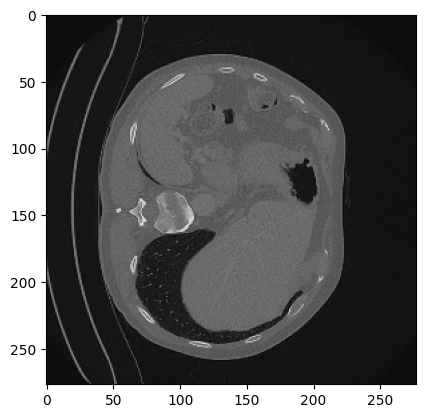


s0325: Age: 65.0, Gender: f, Pathology: other, Pathology Location: abdomen 
CT scan dimensions: (315, 315, 293)


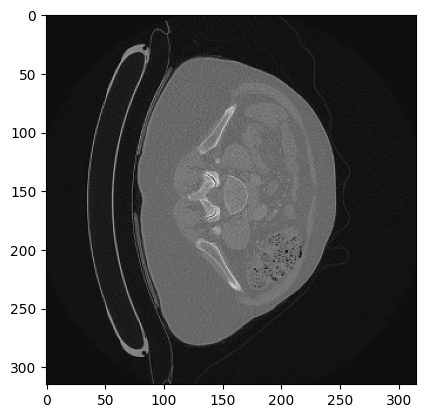


s0320: Age: 80.0, Gender: m, Pathology: vascular, Pathology Location: abdomen 
CT scan dimensions: (272, 272, 282)


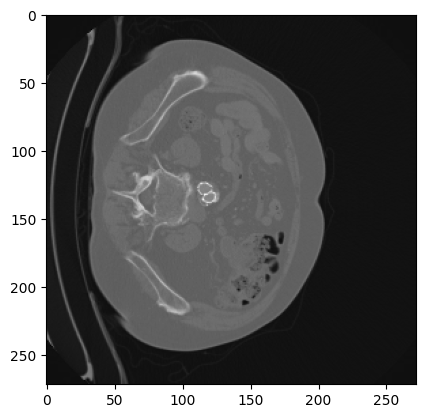


s0193: Age: 63.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 
CT scan dimensions: (278, 174, 278)


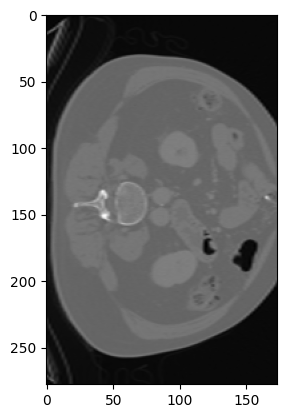


s0189: Age: 50.0, Gender: m, Pathology: vascular, Pathology Location: thorax,abdomen 
CT scan dimensions: (254, 174, 440)


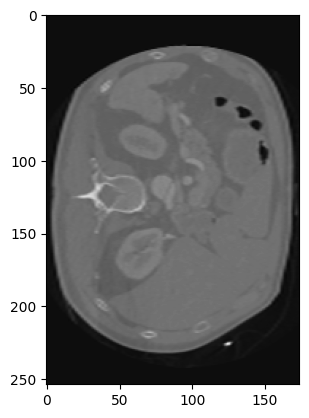


s0330: Age: 67.0, Gender: f, Pathology: no_pathology, Pathology Location: no_location 
CT scan dimensions: (330, 330, 88)


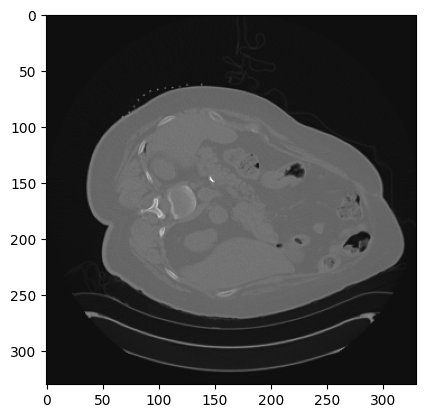


s0329: Age: 46.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 
CT scan dimensions: (304, 329, 329)


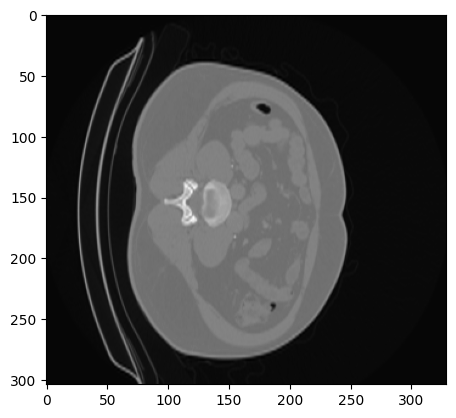


s0326: Age: 56.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 
CT scan dimensions: (217, 168, 217)


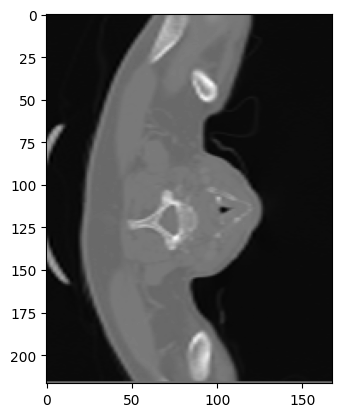


s0328: Age: 60.0, Gender: m, Pathology: inflammation, Pathology Location: abdomen 
CT scan dimensions: (265, 265, 269)


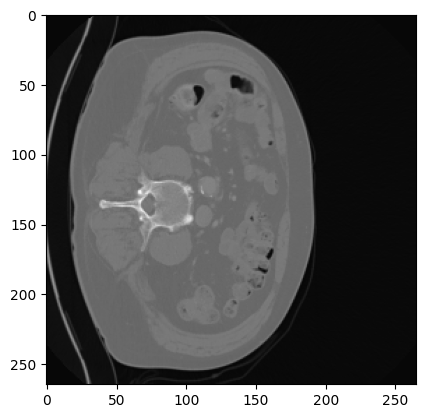

In [50]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nibabel as nib
import warnings as wr
wr.filterwarnings('ignore')

# loading and reading dataset
file_path = 'Totalsegmentator_dataset_v201/meta.csv'
df = pd.read_csv(file_path, delimiter=';')

# displaying ni.gz images
def display_nifti(file_path):
    img = nib.load(file_path)
    data = img.get_fdata()
    print("CT scan dimensions:", data.shape)
    
    plt.imshow(data[:, :, data.shape[2] // 2], cmap='gray')  # grayscale image; source: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html
    plt.show()

# displaying first 10 images (assuming that all the files exist)
for index, row in df.head(10).iterrows():
    img_folder = os.path.join('Totalsegmentator_dataset_v201', row['image_id'])  # row dictionary to access image_id key - selecting appropriate file in which given image_ids are stored;  source: https://www.geeksforgeeks.org/python-os-path-join-method/
    img_file_path = os.path.join(img_folder, 'ct.nii.gz')

    print(f"\n{row['image_id']}: Age: {row['age']}, Gender: {row['gender']}, Pathology: {row['pathology']}, Pathology Location: {row['pathology_location']} ")
    display_nifti(img_file_path)

Below, we can observe that the code is a little bit more exhaustive and can be easily extended to display additional information or visualize other anatomical planes. Here, we decided to add additional information about the image's dimensions and the central slices from each anatomical plane: 




s1366: Age: 50.0, Gender: nan, Pathology: unclear, Pathology Location: unclear 


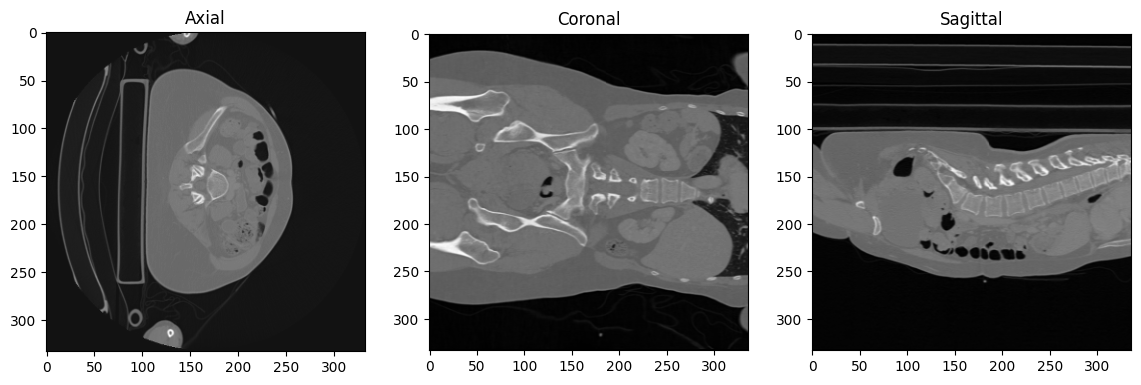


s0245: Age: 77.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


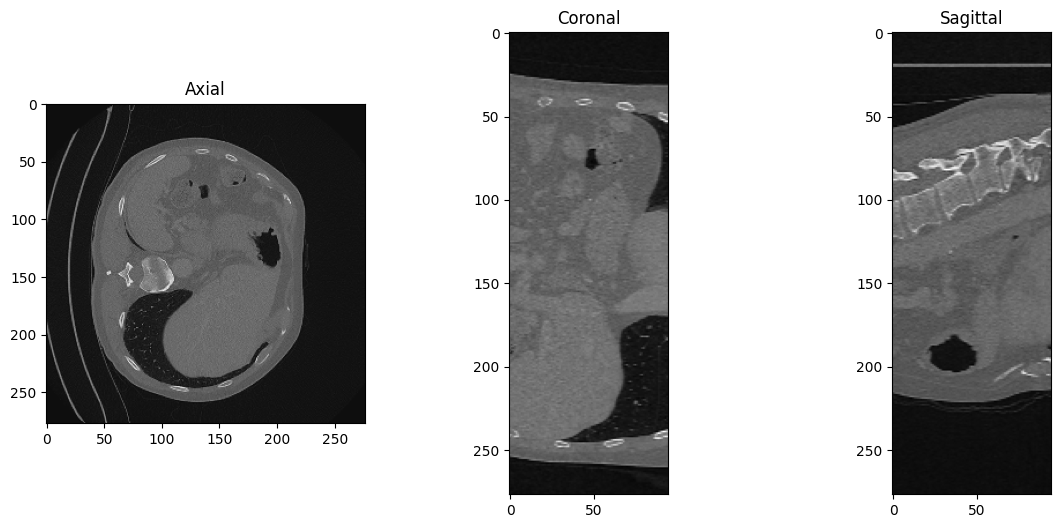


s0325: Age: 65.0, Gender: f, Pathology: other, Pathology Location: abdomen 


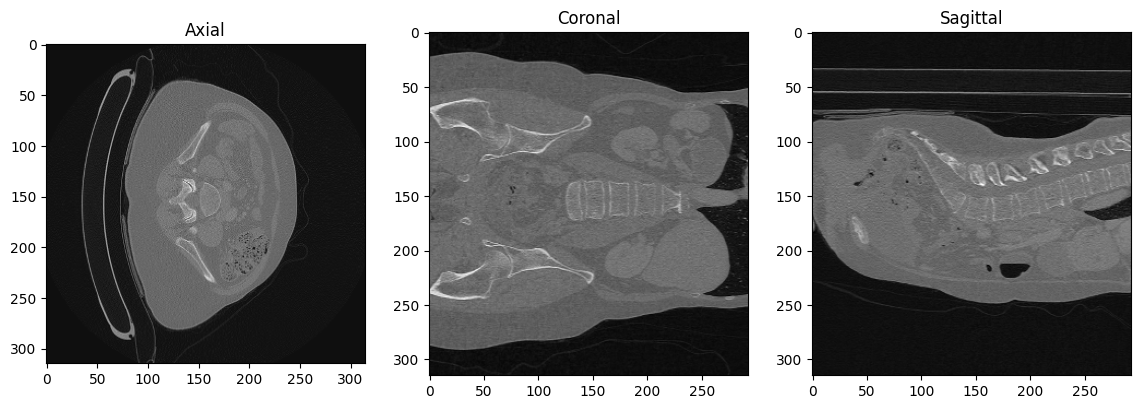


s0320: Age: 80.0, Gender: m, Pathology: vascular, Pathology Location: abdomen 


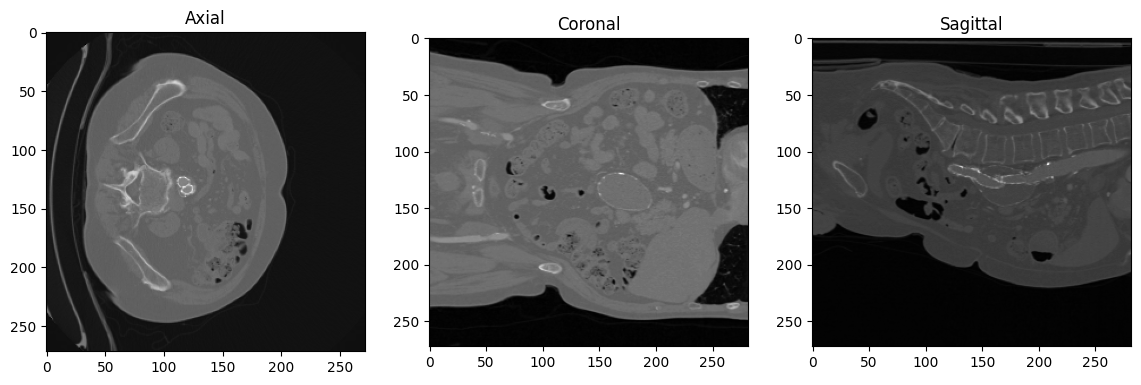


s0193: Age: 63.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


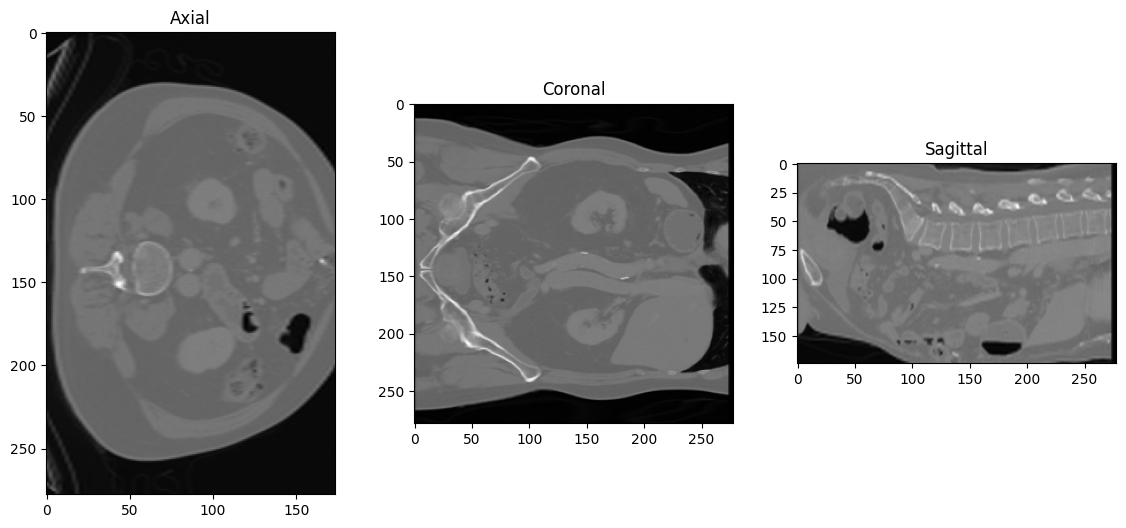


s0189: Age: 50.0, Gender: m, Pathology: vascular, Pathology Location: thorax,abdomen 


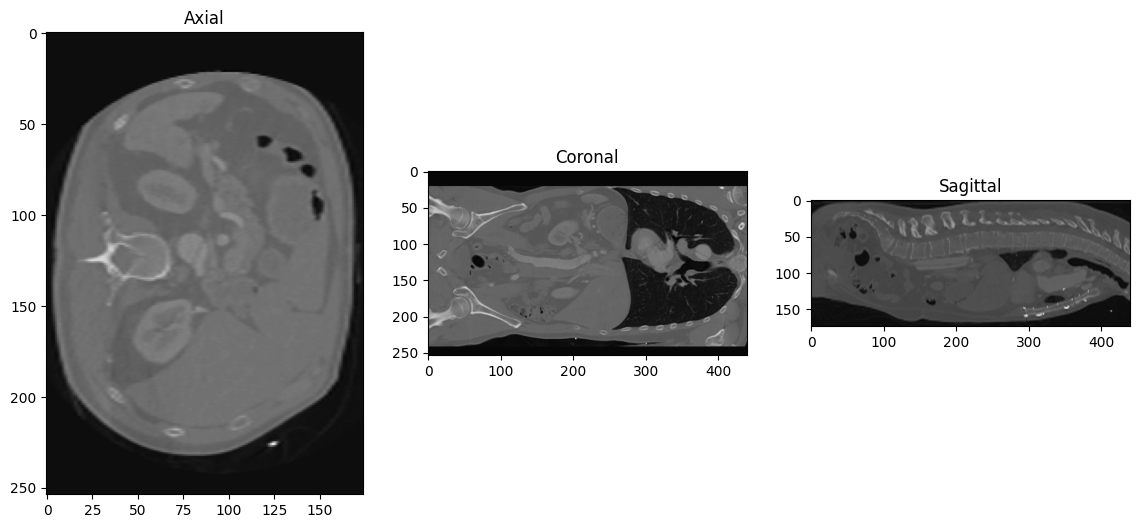


s0330: Age: 67.0, Gender: f, Pathology: no_pathology, Pathology Location: no_location 


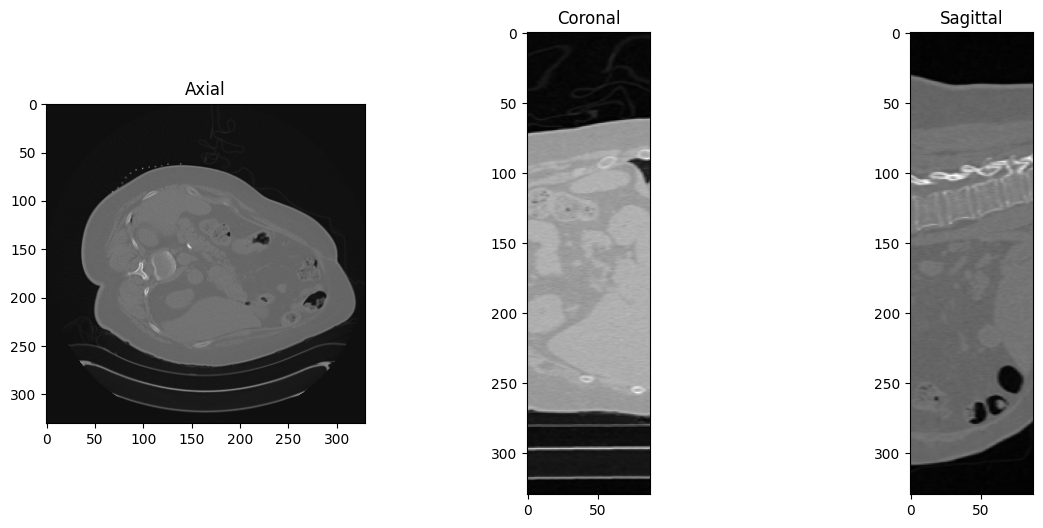


s0329: Age: 46.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


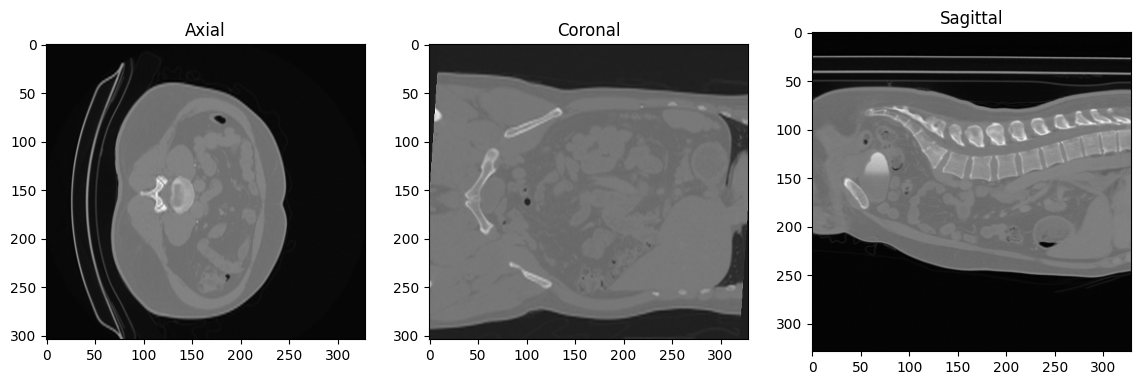


s0326: Age: 56.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


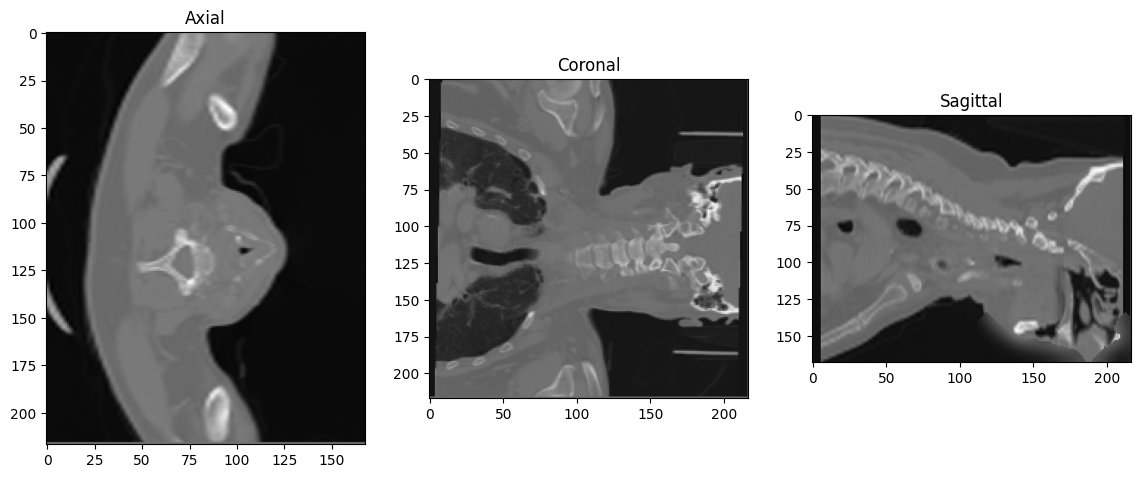


s0328: Age: 60.0, Gender: m, Pathology: inflammation, Pathology Location: abdomen 


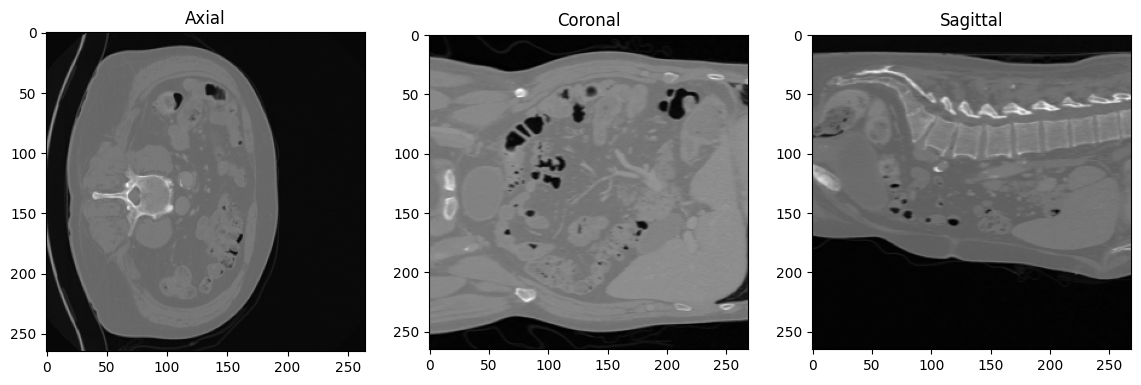

In [51]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nibabel as nib
import warnings as wr
wr.filterwarnings('ignore')

# displaying central slice from each anatomical plane
def display_nifti(img_path):
    img = nib.load(img_path)
    data = img.get_fdata()

    mid_sagittal = data.shape[0] // 2 # middle slice so we divide by half 
    mid_coronal = data.shape[1] // 2
    mid_axial = data.shape[2] // 2

    fig, axes = plt.subplots(1, 3, figsize=(14, 6))

    # axial slice
    axes[0].imshow(data[:, :, mid_axial], cmap='gray') # grayscale image source: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    axes[0].set_title('Axial')

    # coronal slice
    axes[1].imshow(data[:, mid_coronal, :], cmap='gray') # grayscale image
    axes[1].set_title('Coronal')

    # sagittal slice
    axes[2].imshow(data[mid_sagittal, :, :], cmap='gray') # grayscale image
    axes[2].set_title('Sagittal')

    plt.show()

# loading and reading dataset
file_path = 'Totalsegmentator_dataset_v201/meta.csv'
df = pd.read_csv(file_path, delimiter=';')

# displaying dimensions and central slices for the first 10 images (assuming that all the files exist)
for index, row in df.head(10).iterrows():
    img_folder = os.path.join('Totalsegmentator_dataset_v201', row['image_id'])  # row dictionary to access image_id key - selecting appropriate file in which given image_ids are stored;  source: https://www.geeksforgeeks.org/python-os-path-join-method/
    img_file_path = os.path.join(img_folder, 'ct.nii.gz')

    print(f"\n{row['image_id']}: Age: {row['age']}, Gender: {row['gender']}, Pathology: {row['pathology']}, Pathology Location: {row['pathology_location']} ")
    display_nifti(img_file_path)

The central slice, in each anatomical plane of the first 10 images from the dataset, has been displayed. The images are shown in grayscale, and the central slices correspond to the middle slices of each dimension. The axes labels indicate the anatomical planes: axial, coronal, and sagittal. The explanation of each plane is the following:

* **Axial (Traverse Plane)**: This plane divides the body into top and bottom parts. In CT scan, axial slices are used to observe the body's internal structures (cross-sectional view).

* **Coronal (Frontal Plane)**: This plane divides the body into front and back parts. In a CT scan, a coronal image shows a vertical slice from the front to the back of the body (frontal view).

* **Sagittal**: This plane shows the left and right sides of the body. In a CT scan, a sagittal image shows a vertical slice from the left side to the right side (or vice versa) of the body (side view).

Now, to show that the above analysis works properly, let us take 10 random images from the dataset and display their central slices:


s0523: Age: 74.0, Gender: m, Pathology: tumor, Pathology Location: abdomen 


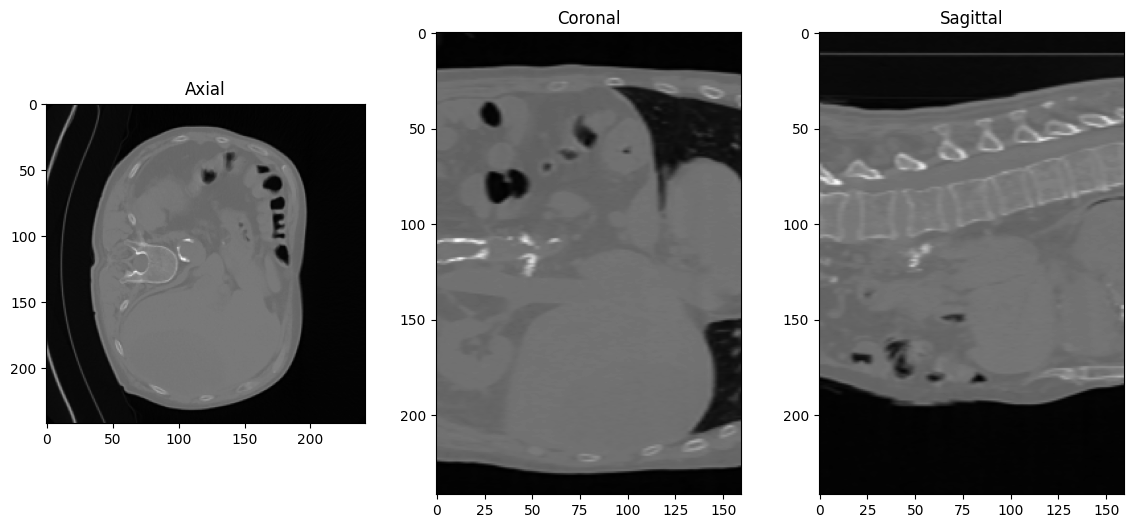


s0270: Age: 69.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


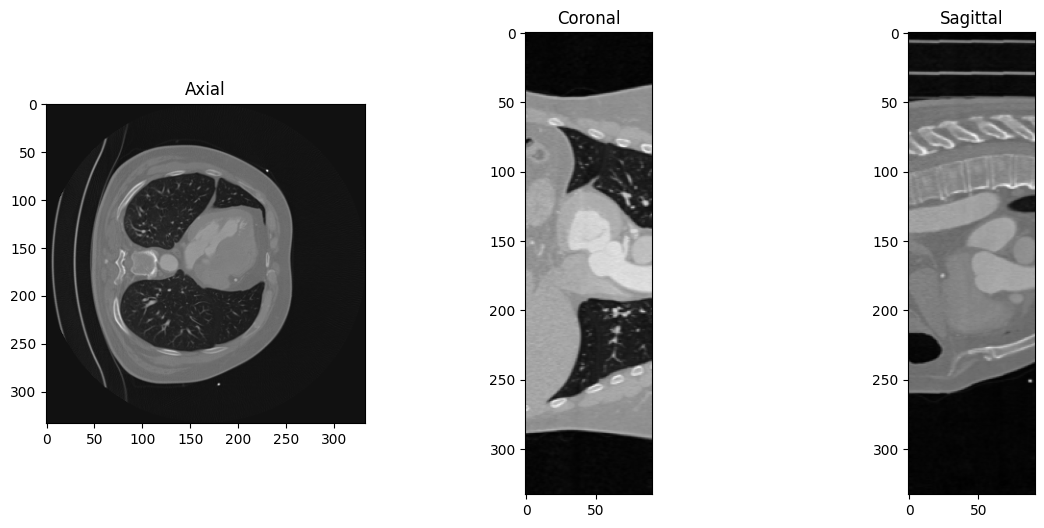


s1161: Age: 52.0, Gender: m, Pathology: trauma, Pathology Location: abdomen 


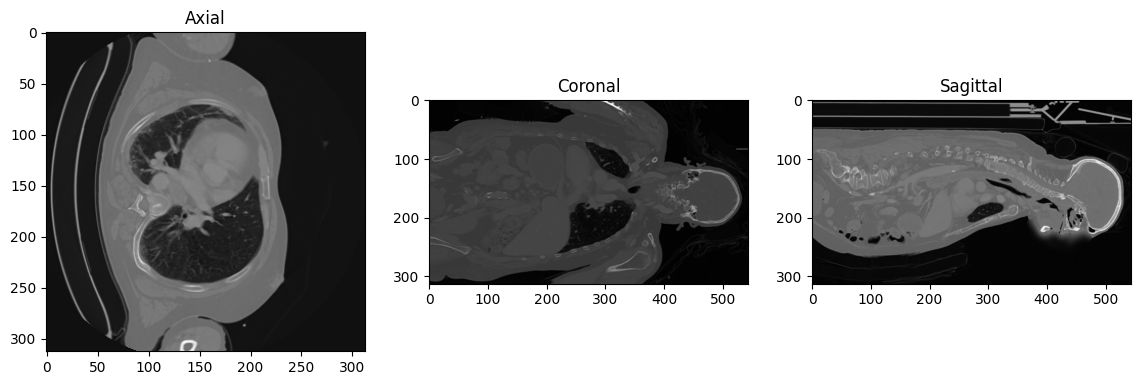


s0046: Age: 78.0, Gender: m, Pathology: unclear, Pathology Location: unclear 


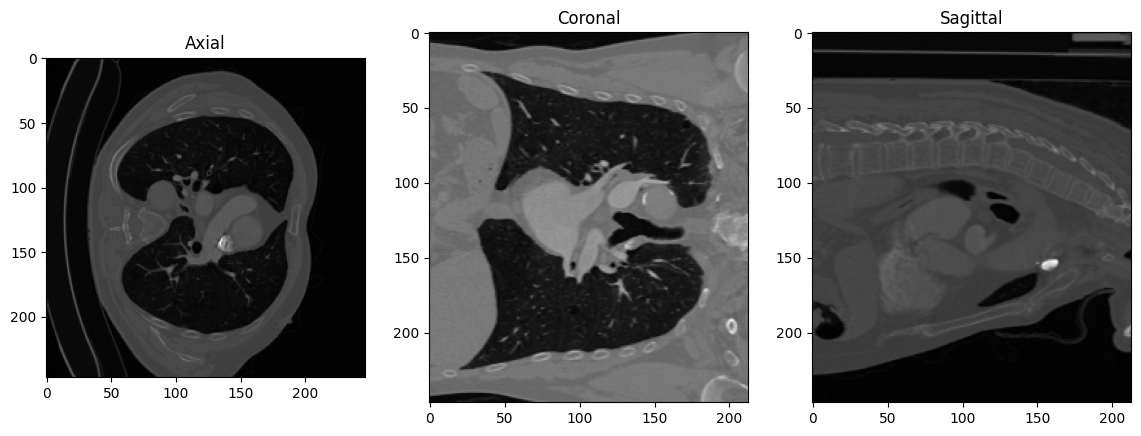


s0327: Age: 72.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


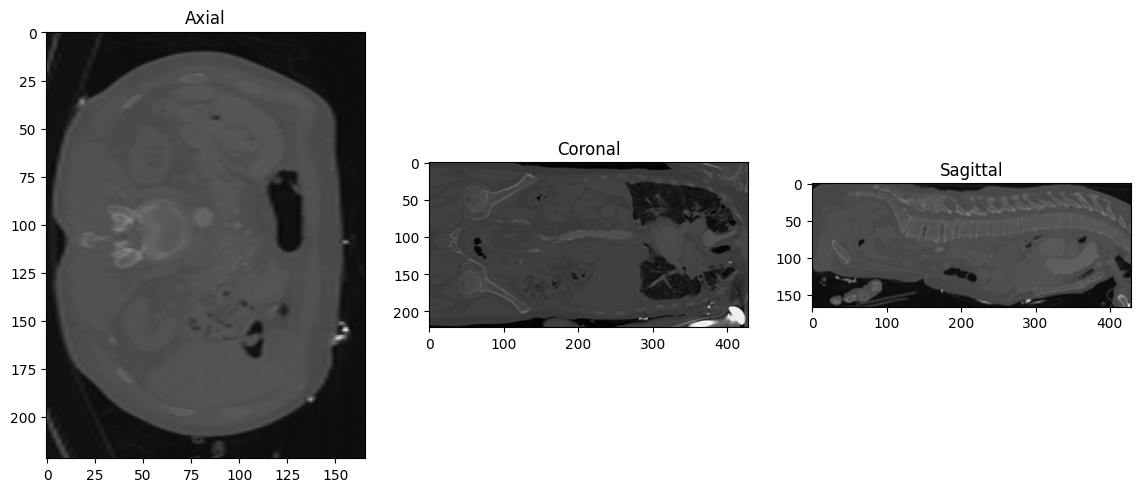


s0433: Age: 39.0, Gender: m, Pathology: unclear, Pathology Location: unclear 


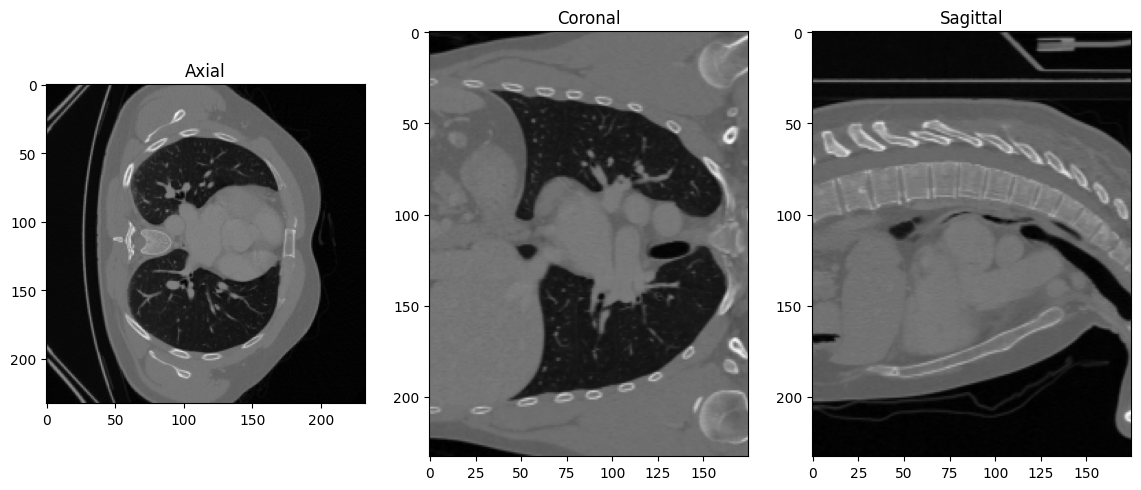


s0450: Age: 51.0, Gender: m, Pathology: unclear, Pathology Location: unclear 


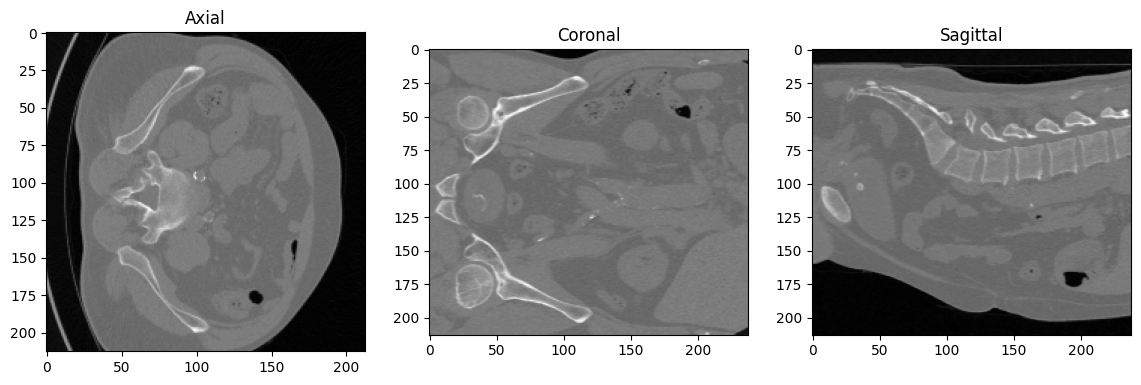


s0048: Age: 69.0, Gender: m, Pathology: tumor, Pathology Location: abdomen 


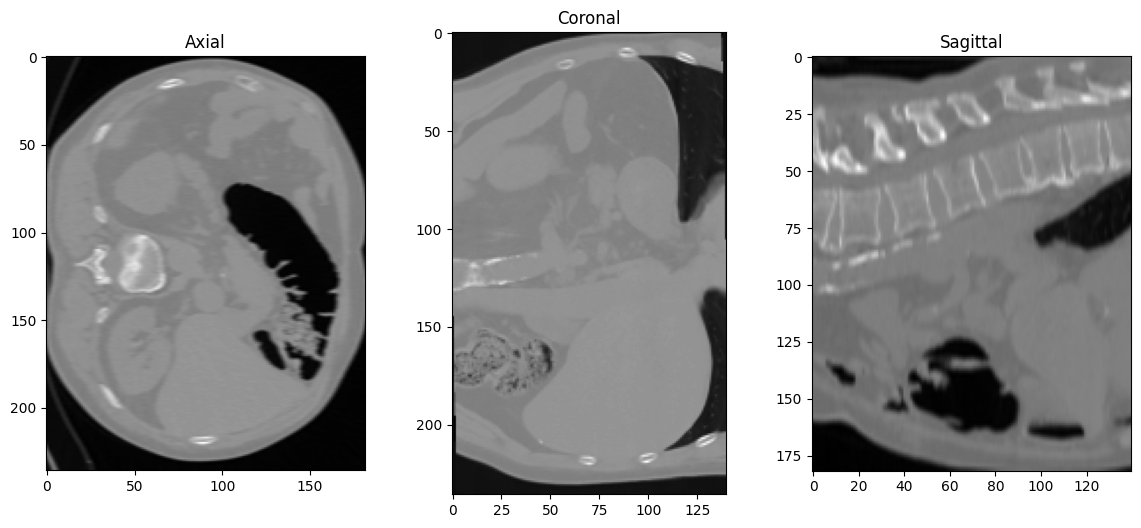


s1337: Age: 62.0, Gender: m, Pathology: no_pathology, Pathology Location: no_location 


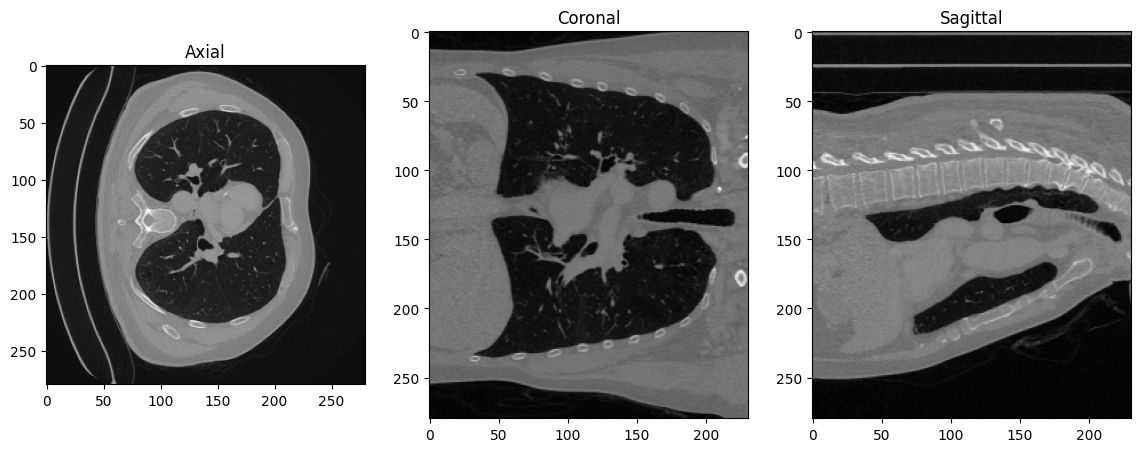


s0921: Age: 51.0, Gender: m, Pathology: other, Pathology Location: pelvis 


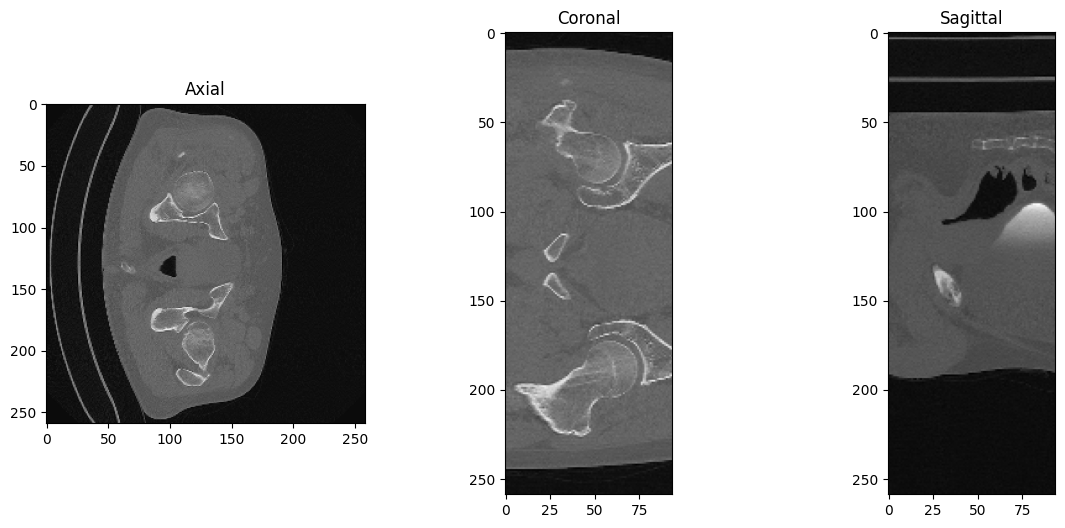

In [110]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import warnings as wr
wr.filterwarnings('ignore')

np.random.seed(55) # setting random seed

# displaying central slice from each anatomical plane
def display_nifti(img_path):
    img = nib.load(img_path)
    data = img.get_fdata()

    mid_sagittal = data.shape[0] // 2 # middle slice so we divide by half 
    mid_coronal = data.shape[1] // 2
    mid_axial = data.shape[2] // 2

    fig, axes = plt.subplots(1, 3, figsize=(14, 6))

    # axial slice
    axes[0].imshow(data[:, :, mid_axial], cmap='gray') # grayscale image source: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    axes[0].set_title('Axial')

    # coronal slice
    axes[1].imshow(data[:, mid_coronal, :], cmap='gray') # grayscale image
    axes[1].set_title('Coronal')

    # sagittal slice
    axes[2].imshow(data[mid_sagittal, :, :], cmap='gray') # grayscale image
    axes[2].set_title('Sagittal')

    plt.show()

# loading and reading dataset
file_path = 'Totalsegmentator_dataset_v201/meta.csv'
df = pd.read_csv(file_path, delimiter=';')

# randomly selecting 10 images 
sample_size = 10
rd_sample = df.sample(n=sample_size, random_state=55) # random sample

# displaying dimensions and central slices for the randomly selected images (assuming that all the files exist)
for index, row in rd_sample.iterrows():
    img_folder = os.path.join('Totalsegmentator_dataset_v201', row['image_id'])  # row dictionary to access image_id key - selecting appropriate file in which given image_ids are stored;  source: https://www.geeksforgeeks.org/python-os-path-join-method/
    img_file_path = os.path.join(img_folder, 'ct.nii.gz')

    print(f"\n{row['image_id']}: Age: {row['age']}, Gender: {row['gender']}, Pathology: {row['pathology']}, Pathology Location: {row['pathology_location']} ")
    display_nifti(img_file_path)

### Explaratory Data Analysis

The last step of our dataset analysis is to explore the dataset and perform some exploratory data analysis (EDA) in order to gain insights about the data - to identify any compelling trends and patterns.

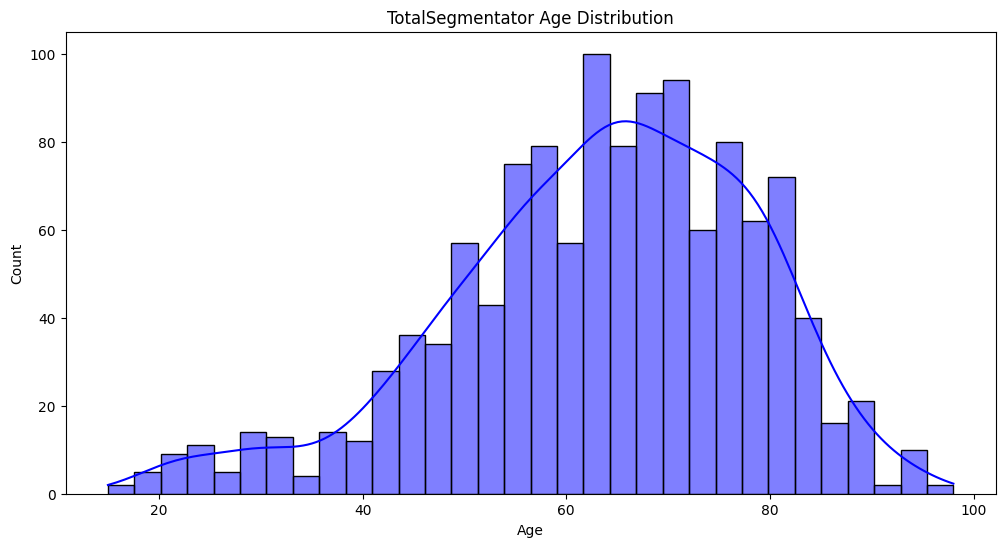

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import os
import warnings as wr
wr.filterwarnings('ignore')


# age distribution    # source: https://matplotlib.org/stable/tutorials/pyplot.html
plt.figure(figsize=(12, 6))
sns.histplot(df['age'], bins=32, kde=True, color='blue')
plt.title('TotalSegmentator Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In the histogram above, we can observe the age distribution within the dataset. The distribution is right-skewed, with a peak around 70 years old, as the Kernel Density Estimation (KDE) line demonstrates (Scikit-Learn.org, n.d). This suggests that the dataset is biased towards older patients than the younger ones.

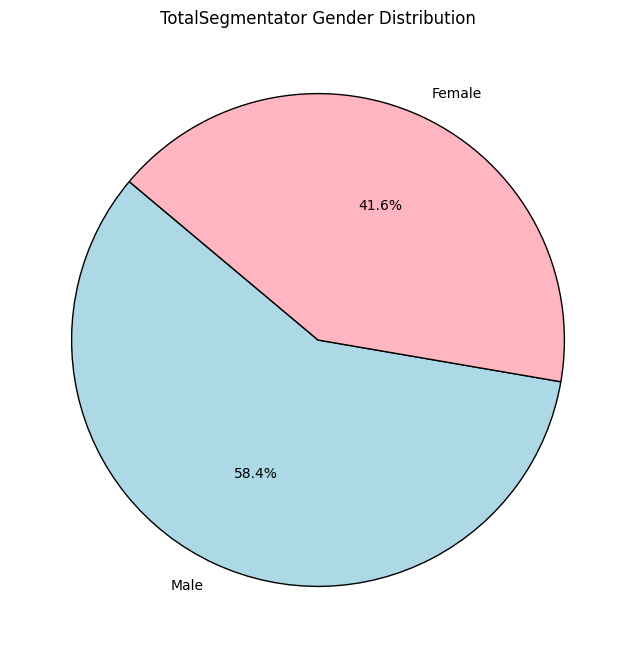

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import os
import warnings as wr
wr.filterwarnings('ignore')

# gender distribution   # source: https://matplotlib.org/stable/tutorials/pyplot.html
gen_counts = pd.Series({'m': 716, 'f': 510})  
colors = ['lightblue', 'lightpink']

plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(
    gen_counts, 
    labels=["Male", "Female"], 
    autopct="%1.1f%%", 
    startangle=140,
    colors = colors,
    wedgeprops = {"linewidth": 1, "edgecolor": "black"},
)
plt.title('TotalSegmentator Gender Distribution') 
plt.show()

The gender distribution shows that there are more male samples (716) than female samples (510), which contributes to 58.4% and 41.6% respectively. 

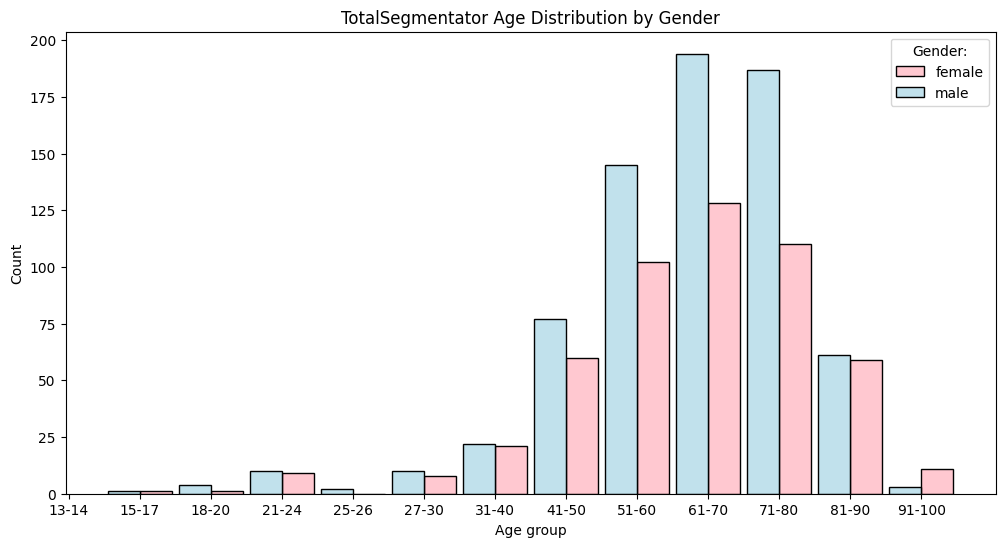

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import os
import warnings as wr
wr.filterwarnings('ignore')

# age binary distrubtion and own-defined labels 
age_bins = [ 0, 2, 4, 6, 9, 12, 14, 17, 20, 24, 26, 30, 40, 50, 60, 70, 80, 90, 100 ]
age_labels = [
    "1-2", "3-4", "5-6", 
    "7-9", "10-12", "13-14", 
    "15-17", "18-20", "21-24", 
    "25-26", "27-30", "31-40", 
    "41-50","51-60", "61-70", 
    "71-80", "81-90", "91-100"
]

# categorizing ages into bins
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=True) # source: https://pandas.pydata.org/docs/reference/api/pandas.cut.html

plt.figure(figsize=(12, 6))
sns.histplot(
    data=df,
    x='age_group',
    hue='gender',
    shrink=0.9,
    multiple='dodge',  
    palette={'m': 'lightblue', 'f': 'lightpink'},  
    stat='count'
)

plt.title('TotalSegmentator Age Distribution by Gender')
plt.xlabel('Age group')
plt.ylabel('Count')
plt.legend(title='Gender:', labels=['female', 'male'], loc='upper right')
plt.show()

In this histogram, the age distribution by gender is presented. We can quickly observe that there is a peak for both males and females, for the age group 61-70, as suggested on the previous histogram. On the other hand, the smallest distibution occurs in the age group 15-17 for both sexes. What is more, this distribution perfectly visualizes the slight imbalance between the number of males and females in the dataset - that there are more male patients than female ones. Nevertheless, the trend within the age group 91-100 is reversed - there are more female patients than male. This might come from the statistic that on average, females tend live longer than males, as men are more likely to suffer from chronic health conditions which are partly due to higher rates of smoking, alcohol, and drug use, as well as enganging in health-risk behaviors (Dattani, S., Rodés-Guirao, L, 2023).


Pathology distribution:
pathology
no_pathology    404
tumor           237
unclear         155
vascular        154
trauma           92
inflammation     86
other            61
bleeding         15
Name: count, dtype: int64


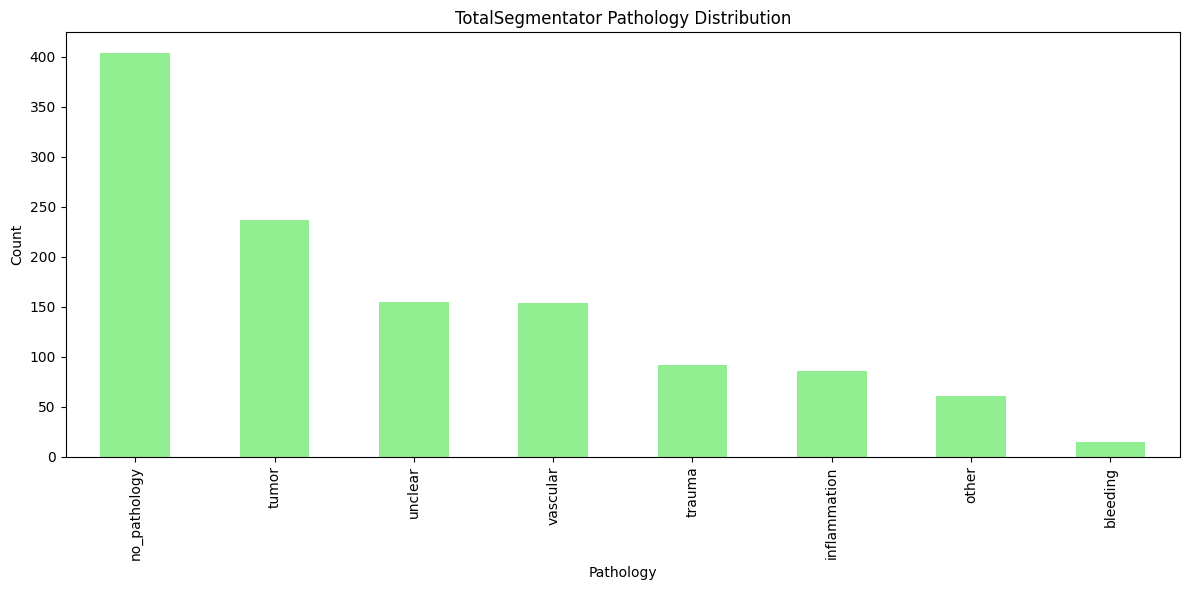

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import os

# counting the number of samples per pathology   # source: https://matplotlib.org/stable/tutorials/pyplot.html
path_counts = df['pathology'].value_counts()
print("\nPathology distribution:")
print(path_counts)

# pathology distribution
plt.figure(figsize=(12, 6))
path_counts.plot(kind='bar', color='lightgreen')
plt.title('TotalSegmentator Pathology Distribution')
plt.xlabel('Pathology')
plt.ylabel('Count')
plt.show() 

The bar graph shows the distribution of different pathologies in the dataset. The majority of the samples belong to no_pathology label, suggesting that most patients are healthy. The next most common pathology are tumors, followed by other diseases (vascular) and conditions (trauma, inflammation, bleeding). However, it is important to note that a significant number of pathlogies within the dataset are not recognised yet.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import os

# counting the number of training, validation, and testing samples
train_count = len(df[df['split'] == 'train'])
validation_count = len(df[df['split'] == 'val'])
test_count = len(df[df['split'] == 'test'])

print("TotalSegmentator split distribution:")
print(f"training set: {train_count}")
print(f"validation set: {validation_count}")
print(f"testing set: {test_count}")

TotalSegmentator split distribution:
training set: 1082
validation set: 57
testing set: 89


As mentioned earlier, in meta.csv there is a distribution between training, validation, and testing samples. There are 1228 images in total, with 88% training, 5% validation, and 7% testing. This distribution may help in maintaining a balanced dataset and ensuring that the model can learn effectively.

### Usage and Advanced Settings

* **Basic Command**: TotalSegmentator -i ct.nii.gz -o segmentations -ta <task_name>
* **Device Selection**: choice between CPU and GPU (--device option)
* **Resolution**: lower resolution model can be used with the --fast option for faster and less memory-intensive operations
* **Interest Region**: specifying a subset of classes to predict (--roi_subset), which reduces runtime and memory requirements
* **Output Options**: generating a single nifti file with all labels (--ml) and getting statistical summaries with --statistics or radiomics features with --radiomics

### Reference List

* Denisty Estimation - scikit-learn 1.5.1 documentation. Retrieved from https://scikit-learn.org/stable/modules/density.html

* Isensee, F. (n.d.). nnU-Net. [Code repository]. GitHub. Retrieved from https://github.com/MIC-DKFZ/nnUNet

* Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring 
method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.


* OpenMedLab. (n.d.). TotalSegmentator_v2 [Code repository]. GitHub. Retrieved from https://github.com/openmedlab/Awesome-Medical-Dataset/blob/main/resources/TotalSegmentator_v2.md

* Saloni Dattani and Lucas Rodés-Guirao (2023) - “Why do women live longer than men?” Published online at OurWorldInData.org. Retrieved from: https://ourworldindata.org/why-do-women-live-longer-than-men [Online Resource]

* Wasserthal, J. (n.d.). TotalSegmentator [Code repository]. GitHub. Retrieved from https://github.com/wasserth/TotalSegmentator 

* Wasserthal, J. (2022). TotalSegmentator [Dataset]. Zenodo. Retrieved from https://doi.org/10.5281/zenodo.6802613

* Wasserthal, J., et al. (2023). Robust Segmentation of 104 Anatomical Structures in CT images. RSNA. Retrieved from https://pubs.rsna.org/doi/10.1148/ryai.230024 

* Wasserthal, J., et al. (2023). Robust Segmentation of 104 Anatomical Structures in CT images [Free Preprint]. arXiv. Retrieved fromhttps://arxiv.org/abs/2208.05868
